<a href="https://colab.research.google.com/github/padmapriyajain/MyPythonworld/blob/master/ML_INTERMEDIATE_SMS_SPAM_DETECTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INSAID ML INTERMEDIATE PROJECT - SMS SPAM DETECTION

<img src =  'https://github.com/padmapriyajain/MyPythonworld/blob/master/IMG3.jpg?raw=true' width="750" height="250">



# Table of Contents

1. [INTRODUCTION](#section1) <br>
  - 1.1 [PROBLEM STATEMENT](#section101)<br>
  - 1.2 [IMPORT LIBRARIES AND DATA](#section102)<br>
2. [DATA DESCRIPTION](#section2) <br>
3. [DATA PREPOCESSING](#section3)<br>
4. [EXPLORATORY DATA ANALYSIS](#section4)<br>
  - 4.1 [What is the spam and ham distribution in the data?](#section401)<br>
  - 4.2 [What is the variations in the actual messages length based on ham or spam?](#section402)<br>
  - 4.3 [What is the variations in the processed messages length based on ham or spam?](#section403)<br>
  - 4.4 [What are the most common words used in ham and spam messages?](#section404)<br>
5. [GENERATING FEATURES AND SCALING OF DATA](#section5)<br>
6. [MODEL PREDICTIONS](#section6)<br>
  - 6.1 [Train Test Split](#section601)
  - 6.2 [Import required libraries for predictions](#section602)
  - 6.3 [Define functions for performing modeling and predictions](#section603)
    - 6.3.1 [Function for running models and printing scores](#section60301)
    - 6.3.2 [Function to get the metrics](#section60302)
    - 6.3.3 [Function for performing randomized search](#section60303)
  - 6.4 [Model Prediction](#section604)
    - 6.4.1 [Base Model Prediction and Metrics](#section60401)
    - 6.4.2 [Parameterized Model Predictions and Metrics](#section60302)
    - 6.4.3 [Parameterized K Nearest Neighbour](#section60303)
7. [CONCLUSION](#section7)<br>

<a id='section1'></a>
# 1. INTRODUCTION:

I am M Padmapriya, student of Jan 2020 cohort. I have takenup the SMS SPAM DETECTION dataset for my ML INTERMEDIATE project.

<a id=section101></a> 
## 1.1 PROBLEM STATEMENT

This dataset is a set of SMS tagged messages that have been collected for SMS Spam research. It contains one set of SMS messages in English of 5,574 messages, tagged acording being ham (legitimate) or spam.

The files contain one message per line. Each line is composed by two columns: v1 contains the label (ham or spam) and v2 contains the raw text.

Can you use this dataset to build a prediction model that will accurately classify which texts are spam??

<a id=section102></a> 
## 1.2 IMPORT LIBRARIES AND DATA

In [1]:
import sys                                                                      # Import packages
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import pie, axis, show
%matplotlib inline                   
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity= 'all' 

import warnings 
# Ignore warning related to pandas_profiling                                                                
warnings.filterwarnings('ignore') 

# Display all dataframe columns in outputs (it has 27 columns, which is wider than the notebook)
# This sets it up to dispaly with a horizontal scroll instead of hiding the middle columns
pd.set_option('display.max_columns', 100)                                       

# Load the dataset to df_sms dataframe
df_sms = pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-3/master/Projects/spam.csv", encoding = "latin-1")     

<a id='section2'></a> 
# 2. DATA DESCRIPTION

In [2]:
# Display sample of data:
df_sms.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3055,ham,Webpage s not available!,NaN,NaN,NaN
4960,ham,"A bit of Ur smile is my hppnss, a drop of Ur t...",NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
5344,ham,When you guys planning on coming over?,NaN,NaN,NaN
4000,ham,He's just gonna worry for nothing. And he won'...,NaN,NaN,NaN


In [3]:
# Lets perform .info on the data:
df_sms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


Observations: SMS SPAM DETECTION dataset has - 
  * 5572 observations/messages
  * 5 columns
  * Columns ( Unamed: 2, Unamed: 3 and Unamed: 4) has a lot of missing values


In [4]:
# Lets perform .describe on the data:
df_sms.describe(include='all')

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


Observations:
  * v1 and v2 has no missing values unlike the other 3 columns.
  * v1 column is the "target" which has 2 unique values and "ham" seems to be the top value with a frequency of 4825.
  * v2 column has 5169 unique values and "Sorry, I'll call later bt not his girlfrnd" has been repeated for 30 times in the dataset.
  * Unamed: 2, Unamed: 3 and Unamed: 4 has very less values out of which most of them are unique values respectively.



Decisions:
  * Unamed: 2, Unamed: 3 and Unamed: 4 has a lot of null values hence it can be dropped.
  * v1 and v2 names can be replaced with 'spam' and 'messages'
  * v1 has 2 values "ham" and "spam", which can be replaced with 0 and 1
  * v2 has text values which needs to be processed and converted to a numerical notation before modelling the dataset.

<a id='section3'></a> 
# 3. DATA PREPROCESSING

In [5]:
# Drop unwanted columns:
df_sms.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)
df_sms.head(5)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
# Change the column names:
df_sms.rename(columns = {'v1':'spam','v2':'messages'},inplace=True)
df_sms.head(5)

,spam,messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
# values in v1
spam_count = df_sms.spam.value_counts()
spam_count
print("\nThis dataset has",round(((spam_count[1]/float(spam_count[0]+spam_count[1]))*100), 2), "% of spam messages.")

ham     4825
spam     747
Name: spam, dtype: int64


This dataset has 13.41 % of spam messages.


In [8]:
# Change the "ham" as 0 and "spam" as 1
df_sms['spam'] = df_sms.spam.map({'ham':0, 'spam':1})
df_sms.head(5)

,spam,messages
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
# Lets inroduce a new column which gives the length of the messages.
df_sms["msg_length"] = df_sms["messages"].str.len()
df_sms.head(5)

,spam,messages,msg_length
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [10]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

The values in the messages columns seems to have:
1. Words with a-z and A-Z (both lower and upper case)
2. Use of punctuations (!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~)
3. Use of numbers (0-9)and float values.
4. Use of whitespaces before and after a word
5. Use of stopwords (A group of words which are highly frequently used without any additional information, such as articles, determiners and prepositions are called stop-words)

Decision:

We have to cleanup all the above observations from the messages so that we can convert the words to different features.

In [11]:
# Replace email addresses with 'email'
df_sms['processed_msg'] = df_sms.messages.str.replace(r'^.+@[^\.].*\.[a-z]{2,}$', 'email')

In [12]:
# Replace web addresses with 'link'
df_sms['processed_msg'] = df_sms.processed_msg.str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$', 'link')
df_sms['processed_msg'] = df_sms.processed_msg.str.replace(r'www\.\S+\.com', 'link')
df_sms['processed_msg'] = df_sms.processed_msg.str.replace(r'www\.\S+\.net', 'link')
df_sms['processed_msg'] = df_sms.processed_msg.str.replace(r'www\.\S+\.org', 'link')

In [13]:
# Remove punctuations:
df_sms['processed_msg'] = df_sms.processed_msg.str.replace('[{}]'.format(string.punctuation), '')

In [14]:
# Replace all numbers with 'number'
df_sms['processed_msg'] = df_sms.processed_msg.str.replace(r'\d+(\.\d+)?', 'number')


In [15]:
# Replace whitespace between terms with a single space
df_sms['processed_msg'] = df_sms.processed_msg.str.replace(r'\s+', ' ')

In [16]:
# Remove leading and trailing whitespace
df_sms['processed_msg'] = df_sms.processed_msg.str.replace(r'^\s+|\s+?$', '')

In [17]:
#Replace money symbols with 'currency'
df_sms['processed_msg'] = df_sms.processed_msg.str.replace(r'£|\$', 'currency')

In [18]:
#Remove non-ascii characters
df_sms['processed_msg'] = df_sms.processed_msg.str.replace(r'[^\x00-\x7f]','')

In [19]:
# Converting the text to lower case:
df_sms['processed_msg'] = df_sms.processed_msg.str.lower()

In [20]:
# Remove the stop words:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
df_sms['processed_msg'] = df_sms['processed_msg'].apply(lambda x: ' '.join(term for term in x.split() if term not in stop_words))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [21]:
# Stemming of the words: This reduces the word to their word stem like run, running to run
from nltk.stem import PorterStemmer
ps = PorterStemmer()
df_sms['processed_msg'] = df_sms['processed_msg'].apply(lambda x: ' '.join(ps.stem(term) for term in x.split()))

In [22]:
df_sms['processed_length'] = df_sms['processed_msg'].str.len()
df_sms.head(5)

,spam,messages,msg_length,processed_msg,processed_length
0,0,"Go until jurong point, crazy.. Available only ...",111,go jurong point crazi avail bugi n great world...,76
1,0,Ok lar... Joking wif u oni...,29,ok lar joke wif u oni,21
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,free entri number wkli comp win fa cup final t...,140
3,0,U dun say so early hor... U c already then say...,49,u dun say earli hor u c alreadi say,35
4,0,"Nah I don't think he goes to usf, he lives aro...",61,nah dont think goe usf live around though,41


<a id='section4'></a> 
# 4 Exploratory Data Analysis

<a id=section401></a>
## 4.1 What is the spam and ham distribution in the data?



In [23]:
# Spam column count values
df_sms.spam.value_counts()

0    4825
1     747
Name: spam, dtype: int64

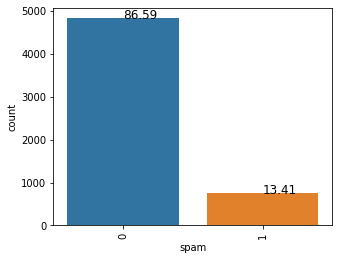

In [24]:
# Plt the spam classification
fig = plt.figure(figsize=(5,4))
fig.patch.set_facecolor('white')
df_sms.spam.value_counts().plot.bar()
sns.countplot(data= df_sms, x = 'spam')
for d in [0, 1]:
    plt.text(d, (df_sms['spam'] == d).sum(), str(round(((df_sms['spam'] == d).sum())*100/(df_sms.shape[0]), 2)), fontsize = 12)
plt.show();

Observations:
  * 13.41% of the messages are spam and 86.59% of the messages are ham.
  * Ham distributions are more than the spam, hence it is not a balanced dataset.

<a id=section402></a>
## 4.2 What is the variations in the actual messages length based on ham or spam?


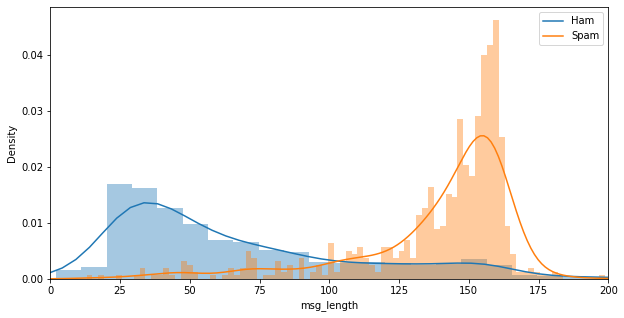

In [25]:
fig = plt.figure(figsize=(10,5))
fig.patch.set_facecolor('white')
plt.xlim(0,200)
sns.distplot(df_sms.loc[df_sms["spam"] == 0]["msg_length"], kde_kws={"label": "Ham"},bins = 100)
sns.distplot(df_sms.loc[df_sms["spam"] == 1]["msg_length"], kde_kws={"label": "Spam"},bins = 100)
plt.legend()
plt.show();

Observations:
  * Spams tend to have more lengthy messages.

<a id=section403></a>
## 4.3 What is the variations in the processed messages length based on ham or spam?

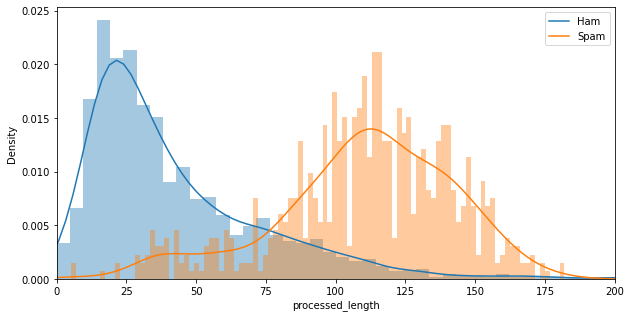

In [26]:
fig = plt.figure(figsize=(10,5))
fig.patch.set_facecolor('white')
plt.xlim(0,200)
sns.distplot(df_sms.loc[df_sms["spam"] == 0]["processed_length"], kde_kws={"label": "Ham"},bins = 100)
sns.distplot(df_sms.loc[df_sms["spam"] == 1]["processed_length"], kde_kws={"label": "Spam"},bins = 100)
plt.legend()
plt.show();

Observations:
  * The message length distributions are overlapping for spam and ham which leaves difficulty in judging a spam or ham, hence we can use the actual message length for prediction which has discrete values that differentiates the data.

<a id=section404></a>
## 4.4 What are the most common words used in ham and spam messages?

In [27]:
from collections import Counter

ham_comm = Counter(" ".join(df_sms[df_sms['spam']==0]["messages"]).split()).most_common(20)
df_ham_comm = pd.DataFrame.from_dict(ham_comm)
df_ham_comm = df_ham_comm.rename(columns={0: "ham_common", 1 : "count"})
spam_comm = Counter(" ".join(df_sms[df_sms['spam']==1]["messages"]).split()).most_common(20)
df_spam_comm = pd.DataFrame.from_dict(spam_comm)
df_spam_comm = df_spam_comm.rename(columns={0: "spam_common", 1 : "count"})

In [28]:
df_ham_comm.head(2)

,ham_common,count
0,to,1530
1,you,1458


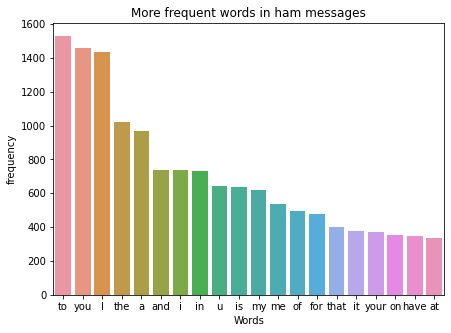

In [29]:
fig = plt.figure(figsize=(7,5))
fig.patch.set_facecolor('white')
sns.barplot(data = df_ham_comm,x= 'ham_common', y = 'count' )
plt.xticks(np.arange(20), df_ham_comm["ham_common"])
plt.title('More frequent words in ham messages')
plt.xlabel('Words')
plt.ylabel('frequency')
plt.show();

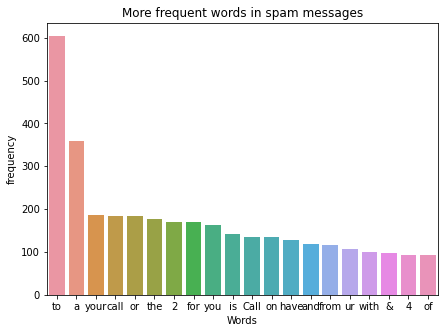

In [30]:
fig = plt.figure(figsize=(7,5))
fig.patch.set_facecolor('white')
sns.barplot(data = df_spam_comm,x= 'spam_common', y = 'count' )
plt.xticks(np.arange(20), df_spam_comm["spam_common"])
plt.title('More frequent words in spam messages')
plt.xlabel('Words')
plt.ylabel('frequency')
plt.show();

Observations:
* We see that most of the common words are stopwords which does not add much value to the information.

<a id='section5'></a> 
# 5 Generating Features and Scaling of data:


In [31]:
df_sms_processed = df_sms.copy()
df_sms_processed.drop(['messages', 'processed_length'], axis = 1, inplace = True)
df_sms_processed.head(5)
df_sms_processed.info()
df_sms_processed.describe()

,spam,msg_length,processed_msg
0,0,111,go jurong point crazi avail bugi n great world...
1,0,29,ok lar joke wif u oni
2,1,155,free entri number wkli comp win fa cup final t...
3,0,49,u dun say earli hor u c alreadi say
4,0,61,nah dont think goe usf live around though


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   spam           5572 non-null   int64 
 1   msg_length     5572 non-null   int64 
 2   processed_msg  5572 non-null   object
dtypes: int64(2), object(1)
memory usage: 130.7+ KB


,spam,msg_length
count,5572.000000,5572.000000
mean,0.134063,80.118808
std,0.340751,59.690841
min,0.000000,2.000000
25%,0.000000,36.000000
50%,0.000000,61.000000
75%,0.000000,121.000000
max,1.000000,910.000000


Decisions:
  * The actual message length should be scaled since its values are ranging from 2 - 910 while the other feature values are 0 and 1.
  * We can use Bag of words approach to extract features from the test data, wherein the entire sentence will be broken into individual words and the occurence of each word is represented as a feature which can be used for classification.

In [32]:
# Separate the processed messages which needs to be vectorized
processed_msg = df_sms_processed.processed_msg
print("Processed message:\n",processed_msg.head(2))
# Separate the target variable which needs to be predicted
y = df_sms_processed.spam
print("Target value:\n", y.head(2))

Processed message:
 0    go jurong point crazi avail bugi n great world...
1                                ok lar joke wif u oni
Name: processed_msg, dtype: object
Target value:
 0    0
1    0
Name: spam, dtype: int64


In [33]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=2000) # Extracting top 2000 text only as features 
X = pd.DataFrame(cv.fit_transform(processed_msg).toarray())
X.shape
X.head(3)

(5572, 2000)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,...,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [34]:
# Scaling of the message length column:
from sklearn.preprocessing import MinMaxScaler
MinMaxScaler = MinMaxScaler(feature_range = (0, 1))
df_sms_processed['scaled_msg_length'] = MinMaxScaler.fit_transform(df_sms_processed[['msg_length']])
df_sms_processed.describe(include='all')

,spam,msg_length,processed_msg,scaled_msg_length
count,5572.000000,5572.000000,5572,5572.000000
unique,NaN,NaN,5083,NaN
top,NaN,NaN,sorri ill call later,NaN
freq,NaN,NaN,30,NaN
mean,0.134063,80.118808,NaN,0.086034
std,0.340751,59.690841,NaN,0.065739
min,0.000000,2.000000,NaN,0.000000
25%,0.000000,36.000000,NaN,0.037445
50%,0.000000,61.000000,NaN,0.064978
75%,0.000000,121.000000,NaN,0.131057


In [35]:
df_sms_processed.head(5)

,spam,msg_length,processed_msg,scaled_msg_length
0,0,111,go jurong point crazi avail bugi n great world...,0.120044
1,0,29,ok lar joke wif u oni,0.029736
2,1,155,free entri number wkli comp win fa cup final t...,0.168502
3,0,49,u dun say earli hor u c alreadi say,0.051762
4,0,61,nah dont think goe usf live around though,0.064978


In [36]:
X.shape
X = pd.concat([X, df_sms_processed.scaled_msg_length], axis = 1)
X.info()
X.head(5)

(5572, 2000)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Columns: 2001 entries, 0 to scaled_msg_length
dtypes: float64(1), int64(2000)
memory usage: 85.1 MB


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,...,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,scaled_msg_length
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.120044
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.029736
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.168502
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.051762
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.064978


In [37]:
y.shape
y.sample(2)

(5572,)

3577    0
1161    0
Name: spam, dtype: int64

<a id='section6'></a>
# 6. MODEL PREDICTIONS

The Target variable "spam" is a binary class variable, hence its a classification dataset where in we need to find if a message is a spam or a ham. The algorithms which I will be applying for this dataset are listed below:
  1. Logistic Regression
  2. Decision Forest Classifier
  3. Random Trees Classifier
  4. K - Nearest Neighbour
  5. Gaussian Naive Bayes

The different metrics we have validating the models are:
  1. Confusion Matrix
  2. Accuracy
  3. Recall
  4. Precision
  5. F1 Score

In this dataset we are trying to classify a message as ham(0) or spam(1)
1. Accuracy : (TP + TN)/ (TP + TN + FP + FN)  
   How many hams and spams where correctly classified??
2. Recall/Sensitivity: TP/ (TP + FN)  
   How many spams where correctly predicted out of the total spams?
3. Precision: TP/(TP + FP)  
   How many spams where correctly predicted out of total predictions?
4. F1 Score: 2.Precision * Recall/ (Precision + Recall)
   Weighted average of True positives and True negatives.

FN: We predicted as not spam but it was actually a spam.
FP: We predicted as spam but it was actually not a spam.

Here, we should avoid predicting a message as spam, which was not a spam, becuase it might be an important message. Hence FP should be less, which means precision should be very high for this dataset.

So, in the modelling, we need to make sure that the accuracy and precision are high.

<a id=section601></a>
## 6.1 Train Test Split

Lets split the data with the ratio of 80:20 for train and test.

In [38]:
from sklearn.model_selection import train_test_split
# Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
print("X Train and Test are: ", X_train.shape, X_test.shape)
print("Y Train and Test are: ", y_train.shape, y_test.shape)

X Train and Test are:  (4457, 2001) (1115, 2001)
Y Train and Test are:  (4457,) (1115,)


<a id=section602></a>
## 6.2 Import required libraries for predictions

In [39]:
# Import required libraries and create a list of base models to be predicted.

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from sklearn.model_selection import GridSearchCV

models = [LogisticRegression(random_state = 42),DecisionTreeClassifier(random_state = 42),RandomForestClassifier(random_state = 42),KNeighborsClassifier(),MultinomialNB(), GaussianNB()]

<a id=section603></a>
## 6.3 Define functions for performing modeling and predictions

<a id=section60301></a>
### 6.3.1 Function for running models and printing scores

In [40]:
def run_model(model, X_train, y_train, X_test, y_test, model_metrics):
    model.fit(X_train, y_train)
    y_pred_test = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    scores = get_metrics(y_train,y_pred_train,y_test,y_pred_test,model_metrics,model)
    return(scores)

<a id=section60302></a>
### 6.3.2 Function to get the metrics

In [41]:
def get_metrics(y_train,y_pred_train,y_test,y_pred_test,model_metrics,model):
    accuracy_test = accuracy_score(y_test, y_pred_test)
    accuracy_train = accuracy_score(y_train, y_pred_train)
    precision_test = precision_score(y_test,y_pred_test)
    precision_train = precision_score(y_train,y_pred_train)
    recall_test = recall_score(y_test,y_pred_test)
    recall_train = recall_score(y_train,y_pred_train)
    f1score_test = f1_score(y_test,y_pred_test)
    f1score_train = f1_score(y_train,y_pred_train)
    new_row = {'model': type(model).__name__, 'accuracy_test': accuracy_test, 'accuracy_train': accuracy_train, 'precision_test': precision_test,
              'precision_train':precision_train, 'recall_test': recall_test, 'recall_train':recall_train,
              'f1score_test' : f1score_test, 'f1score_train':f1score_train}
    model_metrics = model_metrics.append(new_row, ignore_index=True)
    return(model_metrics)

<a id=section60303></a>
### 6.3.3 Function for performing randomized search

In [42]:
def run_grid_model(model, grid, X_train, y_train, X_test, y_test,model_metrics):
    rf_random = RandomizedSearchCV(estimator = model, param_distributions = grid, n_iter = 100, cv = 5, n_jobs = -1, verbose= 3)
    # Fit the random search model
    rf_random.fit(X_train, y_train)
    print(f"Best params of the randomized searchcv model is : {rf_random.best_params_} \n-----------------------------------")
    y_pred_test = rf_random.predict(X_test)
    y_pred_train = rf_random.predict(X_train)
    scores = get_metrics(y_train,y_pred_train,y_test,y_pred_test,model_metrics,model)
    return(scores)

<a id=section604></a>
## 6.4 Model Prediction

<a id=section60401></a>
### 6.4.1 Base Model Prediction and Metrics

In [43]:
print ("This is base model experiementation to decide benchmark models")
data = {'model': [], 'accuracy_test': [], 'accuracy_train':[],'precision_test': [],'precision_train': [], 'recall_test': [], 'recall_train': [], 'f1score_test': [], 'f1score_train': []}
model_metrics = pd.DataFrame(data)
i=0
for eachModel in models:
  model_metrics = run_model(eachModel,X_train, y_train, X_test, y_test, model_metrics)

model_metrics

This is base model experiementation to decide benchmark models


,model,accuracy_test,accuracy_train,precision_test,precision_train,recall_test,recall_train,f1score_test,f1score_train
0,LogisticRegression,0.981166,0.993269,0.992366,0.998243,0.866667,0.951424,0.925267,0.974271
1,DecisionTreeClassifier,0.960538,1.000000,0.848684,1.000000,0.860000,1.000000,0.854305,1.000000
2,RandomForestClassifier,0.983857,1.000000,0.992537,1.000000,0.886667,1.000000,0.936620,1.000000
3,KNeighborsClassifier,0.959641,0.964999,0.981651,0.986755,0.713333,0.748744,0.826255,0.851429
4,MultinomialNB,0.980269,0.986314,0.938356,0.948161,0.913333,0.949749,0.925676,0.948954
5,GaussianNB,0.839462,0.867624,0.451505,0.502949,0.900000,1.000000,0.601336,0.669283


In [44]:
# Test data metrics
print(" Base model prediction: Test data metrics")
model_metrics.iloc[:,[0,1,3,5,7]]

 Base model prediction: Test data metrics


,model,accuracy_test,precision_test,recall_test,f1score_test
0,LogisticRegression,0.981166,0.992366,0.866667,0.925267
1,DecisionTreeClassifier,0.960538,0.848684,0.860000,0.854305
2,RandomForestClassifier,0.983857,0.992537,0.886667,0.936620
3,KNeighborsClassifier,0.959641,0.981651,0.713333,0.826255
4,MultinomialNB,0.980269,0.938356,0.913333,0.925676
5,GaussianNB,0.839462,0.451505,0.900000,0.601336


In [45]:
# Train data metrics
print(" Base model prediction: Train data metrics")
model_metrics.iloc[:,[0,2,4,6,8]]

 Base model prediction: Train data metrics


,model,accuracy_train,precision_train,recall_train,f1score_train
0,LogisticRegression,0.993269,0.998243,0.951424,0.974271
1,DecisionTreeClassifier,1.000000,1.000000,1.000000,1.000000
2,RandomForestClassifier,1.000000,1.000000,1.000000,1.000000
3,KNeighborsClassifier,0.964999,0.986755,0.748744,0.851429
4,MultinomialNB,0.986314,0.948161,0.949749,0.948954
5,GaussianNB,0.867624,0.502949,1.000000,0.669283


Observations:
Random Forest Classifer is our best model with:
  * Highest accuracy of 98.3% for test data and 100% for train data, which means approx 98% of our predictions are correct.
  * Precision of 99.2% test data and 100% train data which means, approx 99% of the spam messages where predicted correctly out of the total predictions.
  * Around approx (12%) of the spam data where missed and wrongly predicted as not spam.

Lets improve the Random Classifier by adding the random grid search feature:

<a id=section60402></a>
### 6.4.2 Parameterized Model Predictions and Metrics

<a id=section6040201></a>
#### 6.4.2.1 Random Forest Classifier with Random Grid search

In [46]:
# Create the random grid
random_grid = {'n_estimators': [50,100],
               'max_features': ['auto', 'sqrt'],
               'max_depth': [10,30,50,70,100],
               'min_samples_split': [2,5,10],
               'min_samples_leaf': [1,2,4],
               'bootstrap': [True,False],
               'criterion': ['gini']}

In [47]:
model_metrics = run_grid_model(RandomForestClassifier(random_state = 42),random_grid, X_train, y_train, X_test, y_test, model_metrics)
model_metrics

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   46.0s
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 284 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 12.0min finished


Best params of the randomized searchcv model is : {'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 100, 'criterion': 'gini', 'bootstrap': False} 
-----------------------------------


,model,accuracy_test,accuracy_train,precision_test,precision_train,recall_test,recall_train,f1score_test,f1score_train
0,LogisticRegression,0.981166,0.993269,0.992366,0.998243,0.866667,0.951424,0.925267,0.974271
1,DecisionTreeClassifier,0.960538,1.000000,0.848684,1.000000,0.860000,1.000000,0.854305,1.000000
2,RandomForestClassifier,0.983857,1.000000,0.992537,1.000000,0.886667,1.000000,0.936620,1.000000
3,KNeighborsClassifier,0.959641,0.964999,0.981651,0.986755,0.713333,0.748744,0.826255,0.851429
4,MultinomialNB,0.980269,0.986314,0.938356,0.948161,0.913333,0.949749,0.925676,0.948954
5,GaussianNB,0.839462,0.867624,0.451505,0.502949,0.900000,1.000000,0.601336,0.669283
6,RandomForestClassifier,0.983857,1.000000,0.978261,1.000000,0.900000,1.000000,0.937500,1.000000


In [48]:
model_metrics.loc[6,"model"] = "RandomForest_RandomSearch" 
model_metrics

,model,accuracy_test,accuracy_train,precision_test,precision_train,recall_test,recall_train,f1score_test,f1score_train
0,LogisticRegression,0.981166,0.993269,0.992366,0.998243,0.866667,0.951424,0.925267,0.974271
1,DecisionTreeClassifier,0.960538,1.000000,0.848684,1.000000,0.860000,1.000000,0.854305,1.000000
2,RandomForestClassifier,0.983857,1.000000,0.992537,1.000000,0.886667,1.000000,0.936620,1.000000
3,KNeighborsClassifier,0.959641,0.964999,0.981651,0.986755,0.713333,0.748744,0.826255,0.851429
4,MultinomialNB,0.980269,0.986314,0.938356,0.948161,0.913333,0.949749,0.925676,0.948954
5,GaussianNB,0.839462,0.867624,0.451505,0.502949,0.900000,1.000000,0.601336,0.669283
6,RandomForest_RandomSearch,0.983857,1.000000,0.978261,1.000000,0.900000,1.000000,0.937500,1.000000


In [49]:
# Test data metrics
print(" Base model and parameterized prediction: Test data metrics")
model_metrics.iloc[:,[0,1,3,5,7]]

 Base model and parameterized prediction: Test data metrics


,model,accuracy_test,precision_test,recall_test,f1score_test
0,LogisticRegression,0.981166,0.992366,0.866667,0.925267
1,DecisionTreeClassifier,0.960538,0.848684,0.860000,0.854305
2,RandomForestClassifier,0.983857,0.992537,0.886667,0.936620
3,KNeighborsClassifier,0.959641,0.981651,0.713333,0.826255
4,MultinomialNB,0.980269,0.938356,0.913333,0.925676
5,GaussianNB,0.839462,0.451505,0.900000,0.601336
6,RandomForest_RandomSearch,0.983857,0.978261,0.900000,0.937500


In [50]:
# Test data metrics
print(" Base model and parameterized prediction: Train data metrics")
model_metrics.iloc[:,[0,2,4,6,8]]

 Base model and parameterized prediction: Train data metrics


,model,accuracy_train,precision_train,recall_train,f1score_train
0,LogisticRegression,0.993269,0.998243,0.951424,0.974271
1,DecisionTreeClassifier,1.000000,1.000000,1.000000,1.000000
2,RandomForestClassifier,1.000000,1.000000,1.000000,1.000000
3,KNeighborsClassifier,0.964999,0.986755,0.748744,0.851429
4,MultinomialNB,0.986314,0.948161,0.949749,0.948954
5,GaussianNB,0.867624,0.502949,1.000000,0.669283
6,RandomForest_RandomSearch,1.000000,1.000000,1.000000,1.000000


Observation:

  * Highest accuracy of 98.3% for test data and 99.68% for train data, which means approx 98% of our predictions are correct.
  * Precision of  100% for test data and train data which means, approx 100% of the spam messages where predicted correctly out of the total predictions.
  * Around approx. (12%) of the spam data where missed and wrongly predicted as not spam.

<a id=section6040203></a>
### 6.4.3 Parameterized K Nearest Neighbour

The following piece of code, helps us in identifying the best k value for maximum precision in the spam classification dataset.

In [51]:
from sklearn.model_selection import cross_val_score
# creating list of K for KNN
k_list = list(range(6,20,2))
# creating list of cv scores
cv_scores = []
# perform 10-fold cross validation
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='precision')
    cv_scores.append(scores.mean())

<Figure size 432x288 with 0 Axes>

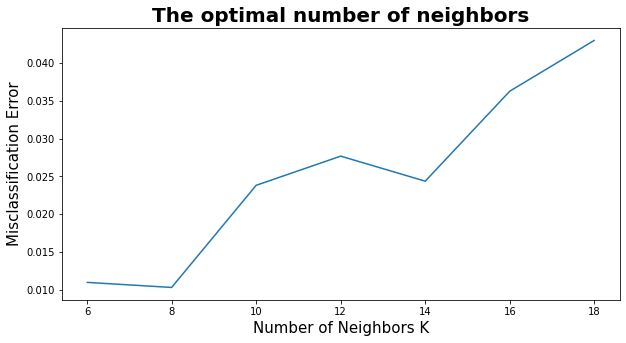

In [52]:
# changing to misclassification error
pre = [1 - x for x in cv_scores]

plt.figure()
plt.figure(figsize=(10,5))
plt.title('The optimal number of neighbors', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Misclassification Error', fontsize=15)
sns.set_style("whitegrid")
plt.plot(k_list, pre)
plt.show();

In [53]:
# finding best k
best_k = k_list[pre.index(min(pre))]
print("The optimal number of neighbors is %d." % best_k)

The optimal number of neighbors is 8.


In [54]:
knnmodel = KNeighborsClassifier(n_neighbors=8)
knnmodel.fit(X_train, y_train)
y_pred_test = knnmodel.predict(X_test)
y_pred_train = knnmodel.predict(X_train)
model_metrics = get_metrics(y_train,y_pred_train,y_test,y_pred_test,model_metrics, knnmodel)
model_metrics

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                     weights='uniform')

,model,accuracy_test,accuracy_train,precision_test,precision_train,recall_test,recall_train,f1score_test,f1score_train
0,LogisticRegression,0.981166,0.993269,0.992366,0.998243,0.866667,0.951424,0.925267,0.974271
1,DecisionTreeClassifier,0.960538,1.000000,0.848684,1.000000,0.860000,1.000000,0.854305,1.000000
2,RandomForestClassifier,0.983857,1.000000,0.992537,1.000000,0.886667,1.000000,0.936620,1.000000
3,KNeighborsClassifier,0.959641,0.964999,0.981651,0.986755,0.713333,0.748744,0.826255,0.851429
4,MultinomialNB,0.980269,0.986314,0.938356,0.948161,0.913333,0.949749,0.925676,0.948954
5,GaussianNB,0.839462,0.867624,0.451505,0.502949,0.900000,1.000000,0.601336,0.669283
6,RandomForest_RandomSearch,0.983857,1.000000,0.978261,1.000000,0.900000,1.000000,0.937500,1.000000
7,KNeighborsClassifier,0.942601,0.950191,0.977778,0.997347,0.586667,0.629816,0.733333,0.772074


In [55]:
model_metrics.loc[7,"model"] = "KNNClassifier_BestK" 
# Test data metrics
print(" Base model prediction: Test data metrics")
model_metrics.iloc[:,[0,1,3,5,7]]

 Base model prediction: Test data metrics


,model,accuracy_test,precision_test,recall_test,f1score_test
0,LogisticRegression,0.981166,0.992366,0.866667,0.925267
1,DecisionTreeClassifier,0.960538,0.848684,0.860000,0.854305
2,RandomForestClassifier,0.983857,0.992537,0.886667,0.936620
3,KNeighborsClassifier,0.959641,0.981651,0.713333,0.826255
4,MultinomialNB,0.980269,0.938356,0.913333,0.925676
5,GaussianNB,0.839462,0.451505,0.900000,0.601336
6,RandomForest_RandomSearch,0.983857,0.978261,0.900000,0.937500
7,KNNClassifier_BestK,0.942601,0.977778,0.586667,0.733333


In [56]:
# Test data metrics
print(" Base model prediction: Train data metrics")
model_metrics.iloc[:,[0,2,4,6,8]]

 Base model prediction: Train data metrics


,model,accuracy_train,precision_train,recall_train,f1score_train
0,LogisticRegression,0.993269,0.998243,0.951424,0.974271
1,DecisionTreeClassifier,1.000000,1.000000,1.000000,1.000000
2,RandomForestClassifier,1.000000,1.000000,1.000000,1.000000
3,KNeighborsClassifier,0.964999,0.986755,0.748744,0.851429
4,MultinomialNB,0.986314,0.948161,0.949749,0.948954
5,GaussianNB,0.867624,0.502949,1.000000,0.669283
6,RandomForest_RandomSearch,1.000000,1.000000,1.000000,1.000000
7,KNNClassifier_BestK,0.950191,0.997347,0.629816,0.772074


Observation:
  * K Nearest Neighbor with optimal K, gives a depreciated result when compared to the base model.
  * Parameters defined were : algorithm='auto', leaf_size=30, metric='minkowski', metric_params=None, n_jobs=None, n_neighbors=8, p=2, weights='uniform'
  * Accuracy of 94.26% for test data and 95.01% for train data, which means approx 94% of our predictions are correct.
  * Precision of  97.7% for test data and 99.73% for train data which means, approx 98% of the spam messages where predicted correctly out of the total predictions.
  * Around approx. (38%) of the spam data where missed and wrongly predicted as not spam.

<a id='section7'></a>
# 7. Conclusion

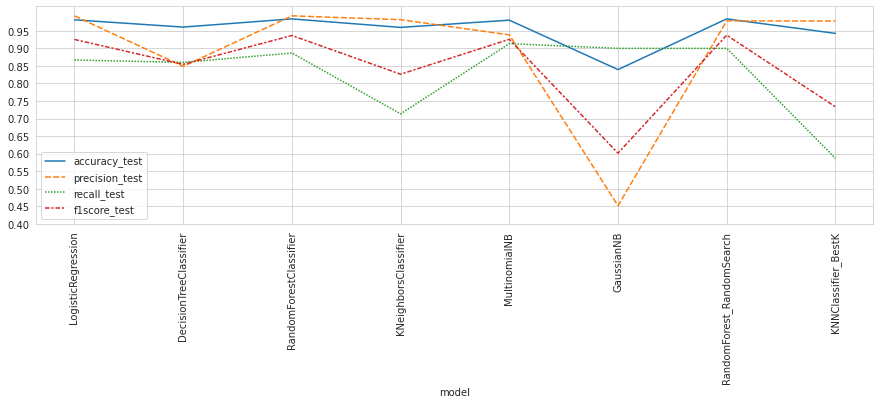

In [57]:
df_test = model_metrics.iloc[:,[0,1,3,5,7]].copy()
df_test.set_index('model', inplace=True)
plt.figure(figsize=(15,4))
sns.lineplot(data = df_test)
plt.xticks(rotation=90)
plt.yticks(np.arange(0.4, 1, step=0.05))
plt.legend(loc = 'upper_right')
plt.show();

Conclusions:

Here by I conclude that the Random Forest Classifier with randomized search is the best model for spam detection dataset